In [8]:
# 모듈 및 데이터 로드
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)

[[337  20]
 [ 30 182]]


* 정확도

In [3]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y, y_pred))

0.9121265377855887


* 정밀도

In [4]:
from sklearn.metrics import precision_score
print(precision_score(y,y_pred))

0.900990099009901


* 재현율

In [5]:
from sklearn.metrics import recall_score
print(recall_score(y,y_pred))

0.8584905660377359


* F1 score

In [6]:
from sklearn.metrics import f1_score
print(f1_score(y, y_pred))

0.8792270531400966


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [10]:
from sklearn.preprocessing import Binarizer

In [17]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
model_lor.predict_proba(X)
y_pred2 = (model_lor.predict_proba(X)[:,1]>0.1).astype(int)

# 혼동행렬
print(confusion_matrix(y,y_pred2))
# 정확도
print(accuracy_score(y, y_pred2))
# 정밀도
print(precision_score(y,y_pred2))
# 재현율
print(recall_score(y,y_pred2))
# f1 score
print(f1_score(y, y_pred2))

[[267  90]
 [  6 206]]
0.8312829525483304
0.6959459459459459
0.9716981132075472
0.8110236220472441


* ROC 곡선 시각화

In [14]:
from sklearn.metrics import roc_curve
probas = model_lor.predict_proba(X)
fpr, tpr, thresholds = roc_curve(y, probas[:,1])

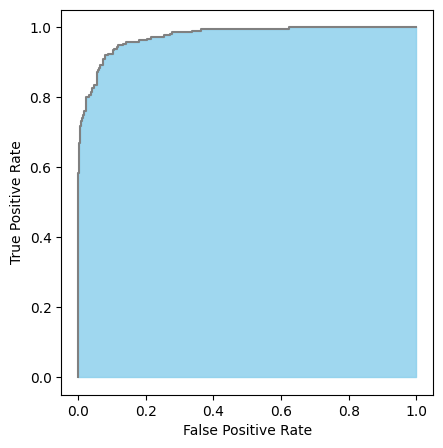

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(4.8, 5)
ax.step(fpr, tpr, 'gray')
ax.fill_between(fpr, tpr, 0, color='skyblue', alpha=0.8)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_facecolor('xkcd:white')
plt.show()

* ROC AUC 값

In [15]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, probas[:,1])

0.9741424871835527